In [78]:
#Just in Case
import warnings
warnings.filterwarnings('ignore')

#Importando las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm

from imblearn.under_sampling import NearMiss         #Para llevar a cabo UnderSampling
from graphviz import Source
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text, plot_tree
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn.preprocessing import label_binarize
from mlxtend.plotting import plot_decision_regions

In [79]:
#Estableciendo el directorio de trabajo
os.chdir('D:\Social Data Consulting\Python for Data Science\data')

In [80]:
mifichero="UCI_Credit_Card.csv"
creditcard=pd.read_csv(mifichero)
creditcard.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [81]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [82]:
creditcard.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [83]:
pd.value_counts(creditcard['default.payment.next.month'])

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [84]:
predictores=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
target=['default.payment.next.month']

In [85]:
del creditcard['ID']

### **_1. Construir data de entrenamiento y testeo_**

In [86]:
creditcard.shape[1]

24

In [87]:
X=creditcard.iloc[:,0:creditcard.shape[1]-1].values
y=creditcard.iloc[:,creditcard.shape[1]-1].values

In [88]:
xtrain,xtest,ytrain,ytest=train_test_split(X,
                                           y,
                                           test_size=0.2,
                                           random_state=2020,
                                           stratify=y)

In [89]:
#Datos de entrenamiento
xtrain= pd.DataFrame(xtrain,columns=predictores)
ytrain= pd.DataFrame(ytrain,columns=target)

df_creditcard_entrenamiento = pd.concat([xtrain, ytrain], axis=1)
df_creditcard_entrenamiento.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,110000.0,1.0,2.0,1.0,36.0,1.0,2.0,0.0,0.0,0.0,...,105373.0,71733.0,61020.0,0.0,4308.0,3196.0,2536.0,2322.0,2001.0,0
1,50000.0,2.0,2.0,2.0,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,2525.0,0.0,0.0,0.0,0.0,0
2,140000.0,2.0,2.0,2.0,49.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,3794.0,0.0,865.0,367.0,0.0,3794.0,0.0,865.0,825.0,1
3,50000.0,1.0,3.0,1.0,47.0,0.0,0.0,0.0,2.0,0.0,...,15181.0,15928.0,16671.0,2000.0,2000.0,1000.0,1000.0,1000.0,1000.0,0
4,20000.0,1.0,2.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,54.0,54.0,54.0,0.0,0.0,0.0,0.0,0.0,2966.0,1


### **_2. Utilizar UnderSampling para balanceo de datos, teniendo en cuenta los siguientes parámetros: 07 para proporción de etiquetas poco representadas y 2020 como semilla._**

In [90]:
count_classes=pd.value_counts(df_creditcard_entrenamiento['default.payment.next.month'])
count_classes

0    18691
1     5309
Name: default.payment.next.month, dtype: int64

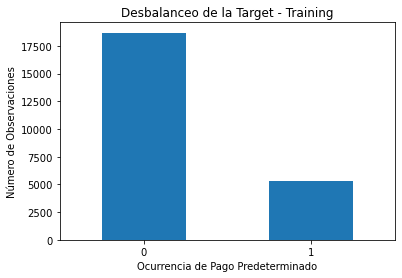

In [91]:
#Graficando el Desbalanceo de la Target en el Training Set
count_classes.plot(kind='bar',rot=0)
plt.title('Desbalanceo de la Target - Training')
plt.xlabel('Ocurrencia de Pago Predeterminado')
plt.ylabel('Número de Observaciones')
plt.show()

In [151]:
#Primero creamos una instancia de NearMiss
us=NearMiss(sampling_strategy=0.7)

In [152]:
#fit_resample me arroja 2 objetos ya balanceados
xtrain_under,ytrain_under= us.fit_sample(xtrain,ytrain)

In [153]:
#Datos de Entrenamiento DF
xtrain_under_df=pd.DataFrame(xtrain_under,columns=predictores)
ytrain_under_df=pd.DataFrame(ytrain_under,columns=target)

xtest_df=pd.DataFrame(xtest,columns=predictores)
ytest_df=pd.DataFrame(ytest,columns=target)


df_creditcard_entrenamiento=pd.concat([xtrain_under_df,ytrain_under_df],axis=1)
df_creditcard_test=pd.concat([xtest_df,ytest_df],axis=1)
df_creditcard_entrenamiento.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,360000.0,2.0,1.0,1.0,36.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,360000.0,2.0,2.0,2.0,34.0,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,360000.0,1.0,1.0,1.0,39.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,360000.0,2.0,2.0,1.0,40.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,360000.0,2.0,1.0,1.0,42.0,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


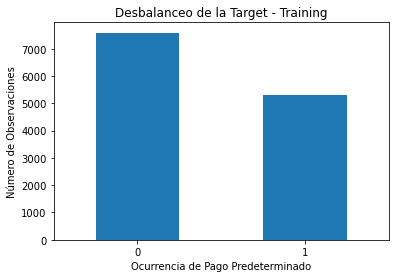

In [154]:
count_classes=pd.value_counts(df_creditcard_entrenamiento['default.payment.next.month'])
#Graficando el Desbalanceo de la Target en el Training Set balanceado
count_classes.plot(kind='bar',rot=0)
plt.title('Desbalanceo de la Target - Training')
plt.xlabel('Ocurrencia de Pago Predeterminado')
plt.ylabel('Número de Observaciones')
plt.show()

### **_3. Construir el modelo de árboles de decisión_**

In [155]:
#Creacion del modelo de arbol de decision
tree=DecisionTreeClassifier(criterion='entropy',
                           min_samples_split=20,
                           max_depth=3,
                           random_state=2020)

In [156]:
#Evaluando la validacion cruzada
score=cross_val_score(tree, # Estimator
                     xtrain_under, #Matriz de Datos
                     ytrain_under, #Target
                     scoring='accuracy', #Metrica de referencia
                     cv=10) #Numero de particiones
score

array([0.75348837, 0.73023256, 0.67286822, 0.69899147, 0.73235066,
       0.742436  , 0.74553918, 0.75252133, 0.72381691, 0.69123351])

In [157]:
#Aprendemos de los datos de entrenamiento
tree=tree.fit(xtrain_under,ytrain_under)

### **_4. Graficar el árbol de decisión._**

In [158]:
#Iniciando proceso de grafica
with open('creditcard_dtree.dot','w') as dotfile : #W viene de write para escritura sobre el objeto
    export_graphviz(tree,
                    out_file=dotfile,
                    feature_names=predictores)
    dotfile.close()

In [159]:
#Leyendo el archivo creado
file=open('creditcard_dtree.dot','r') #r viene de read
text=file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="PAY_0 <= 1.5\\nentropy = 0.977\\nsamples = 12893\\nvalue = [7584, 5309]"] ;\n1 [label="BILL_AMT1 <= 86353.0\\nentropy = 0.916\\nsamples = 10686\\nvalue = [7150, 3536]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="PAY_AMT4 <= 9804.0\\nentropy = 0.881\\nsamples = 10119\\nvalue = [7085, 3034]"] ;\n1 -> 2 ;\n3 [label="entropy = 0.868\\nsamples = 9961\\nvalue = [7076, 2885]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.315\\nsamples = 158\\nvalue = [9, 149]"] ;\n2 -> 4 ;\n5 [label="LIMIT_BAL <= 145000.0\\nentropy = 0.514\\nsamples = 567\\nvalue = [65, 502]"] ;\n1 -> 5 ;\n6 [label="entropy = 0.865\\nsamples = 223\\nvalue = [64, 159]"] ;\n5 -> 6 ;\n7 [label="entropy = 0.029\\nsamples = 344\\nvalue = [1, 343]"] ;\n5 -> 7 ;\n8 [label="BILL_AMT1 <= 80760.0\\nentropy = 0.715\\nsamples = 2207\\nvalue = [434, 1773]"] ;\n0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n9 [label="BILL_AMT1 <= 2207.5\\nentropy = 0.80

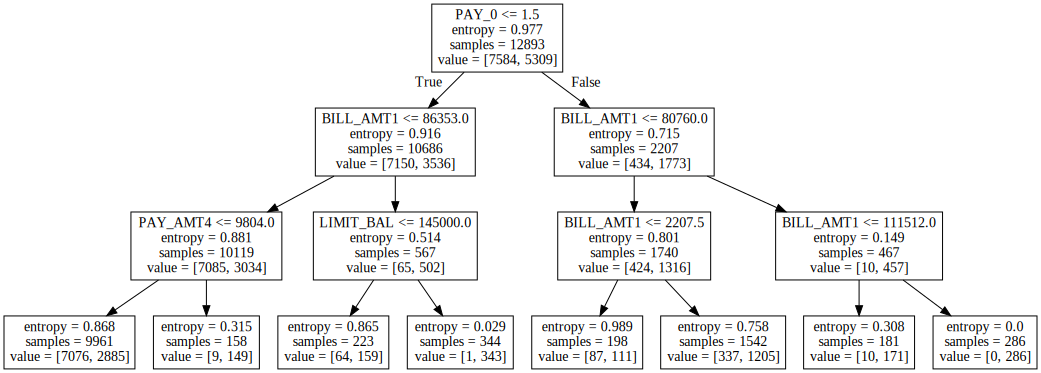

In [160]:
#Visualizando el grafico de arbol
Source(text)

### **_5. Generar las gráficas de variables importantes._**

In [161]:
tree.feature_importances_

array([0.03883187, 0.        , 0.        , 0.        , 0.        ,
       0.54221704, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.3236743 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.09527679, 0.        , 0.        ])

In [162]:
importancia_predictores = pd.DataFrame(
                            {'predictor': df_creditcard_entrenamiento.drop(columns ='default.payment.next.month').columns,
                             'importancia': tree.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
5,PAY_0,0.542217
11,BILL_AMT1,0.323674
20,PAY_AMT4,0.095277
0,LIMIT_BAL,0.038832
4,AGE,0.000000
14,BILL_AMT4,0.000000
21,PAY_AMT5,0.000000
2,EDUCATION,0.000000
19,PAY_AMT3,0.000000
18,PAY_AMT2,0.000000


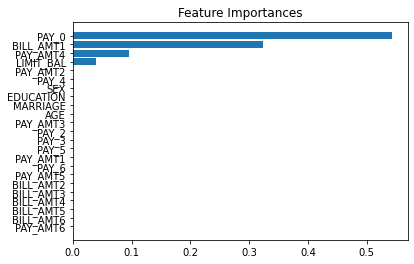

In [163]:
plt.title('Feature Importances')
plt.barh(importancia_predictores.sort_values('importancia', ascending=True).predictor,importancia_predictores.sort_values('importancia', ascending=True).importancia)
plt.show()

### **_6. Métricas de evaluación de modelos para datos de entrenamiento y testeo_**

In [164]:
prob_train=tree.predict_proba(xtrain_under)
prob_df_train_tree=pd.DataFrame(prob_train[:,1],columns=['prob y=0'])

In [182]:
punto_corte=0.5
prob_df_train_tree['prediccion']=np.where(prob_df_train_tree['prob y=0']>punto_corte,0,1)
prob_df_train_tree

,prob y=0,prediccion
0,0.289630,1
1,0.289630,1
2,0.289630,1
3,0.289630,1
4,0.289630,1
...,...,...
12888,0.781453,0
12889,0.289630,1
12890,0.289630,1
12891,0.713004,0


In [179]:
prob_test=tree.predict_proba(xtest)
prob_df_test_tree=pd.DataFrame(prob_test[:,1],columns=['prob y=0'])

In [181]:
punto_corte=0.5
prob_df_test_tree['prediccion']=np.where(prob_df_test_tree['prob y=0']>punto_corte,0,1)
prob_df_test_tree

,prob y=0,prediccion
0,0.289630,1
1,0.289630,1
2,0.289630,1
3,0.289630,1
4,0.289630,1
...,...,...
5995,0.289630,1
5996,0.289630,1
5997,0.781453,0
5998,0.289630,1


##### **METRICAS PARA DATA DE ENTRENAMIENTO**

In [166]:
cm_train=pd.crosstab(ytrain_under['default.payment.next.month'],prob_df_train_tree['prediccion'])
cm_train

prediccion,0,1
default.payment.next.month,,
0,508,7076
1,2424,2885


In [171]:
VP_train=cm_train[0][0]
VN_train=cm_train[1][1]
FP_train=cm_train[1][0]
FN_train=cm_train[0][1]

In [190]:
accuracy_train_tree=(VP_train+VN_train)/(VP_train+VN_train+FP_train+FN_train)
print('El accuracy para la Data de Entrenamiento es: ', accuracy_train_tree.round(3))

El accuracy para la Data de Entrenamiento es:  0.263


In [188]:
sensibilidad_train_tree=(VP_train)/(VP_train+FN_train)
print('La sensibilidad para la Data de Entrenamiento es: ', sensibilidad_train_tree.round(3))

La sensibilidad para la Data de Entrenamiento es:  0.29


In [189]:
especificidad_train_tree=(VN_train)/(VN_train+FP_train)
print('La especificidad para la Data de Entrenamiento es: ', especificidad_train_tree.round(3))

La especificidad para la Data de Entrenamiento es:  0.173


In [175]:
#Para calcular de la curva ROC y AUC, la función roc_curve exige que las categorias sean 0 y 1
fpr,tpr,thresholds=roc_curve(ytrain_under,prob_df_train_tree['prediccion'])
auc_train_tree=auc(fpr,tpr)
print('El area Bajo la Curva(AUC) para Data de Entrenamiento es: ',auc_train_tree.round(3))

El area Bajo la Curva(AUC) para Data de Entrenamiento es:  0.305


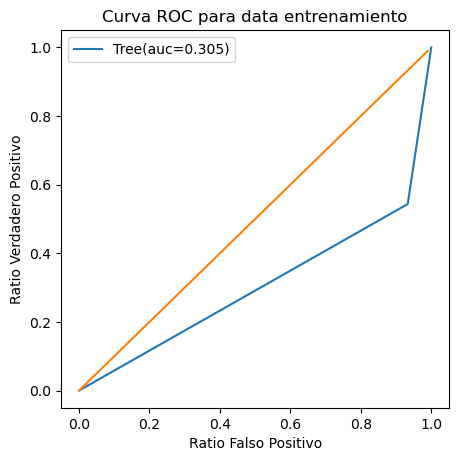

In [177]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label="Tree(auc=%0.3f)"%auc_train_tree)
plt.title('Curva ROC para data entrenamiento')
plt.xlabel('Ratio Falso Positivo')
plt.ylabel('Ratio Verdadero Positivo')
plt.legend()

x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.show()

##### **METRICAS PARA DATA DE TESTING**

In [184]:
cm_test=pd.crosstab(ytest,prob_df_test_tree['prediccion'])
cm_test

prediccion,0,1
row_0,,
0,1439,3234
1,576,751


In [185]:
VP_test=cm_test[0][0]
VN_test=cm_test[1][1]
FP_test=cm_test[1][0]
FN_test=cm_test[0][1]

In [186]:
accuracy_test_tree=(VP_test+VN_test)/(VP_test+VN_test+FP_test+FN_test)
print('El accuracy para la Data de Testeo es: ', accuracy_test_tree.round(3))

El accuracy para la Data de Testeo es:  0.365


In [191]:
sensibilidad_test_tree=(VP_test)/(VP_test+FN_test)
print('La sensibilidad para la Data de Testeo es: ', sensibilidad_test_tree.round(3))

La sensibilidad para la Data de Testeo es:  0.714


In [192]:
especificidad_test_tree=(VN_test)/(VN_test+FP_test)
print('La especificidad para la Data de Testeo es: ', especificidad_test_tree.round(3))

La especificidad para la Data de Testeo es:  0.188


In [193]:
#Para calcular de la curva ROC y AUC, la función roc_curve exige que las categorias sean 0 y 1
fpr,tpr,thresholds=roc_curve(ytest,prob_df_test_tree['prediccion'])
auc_test_tree=auc(fpr,tpr)
print('El area Bajo la Curva(AUC) para Data de Entrenamiento es: ',auc_test_tree.round(3))

El area Bajo la Curva(AUC) para Data de Entrenamiento es:  0.437


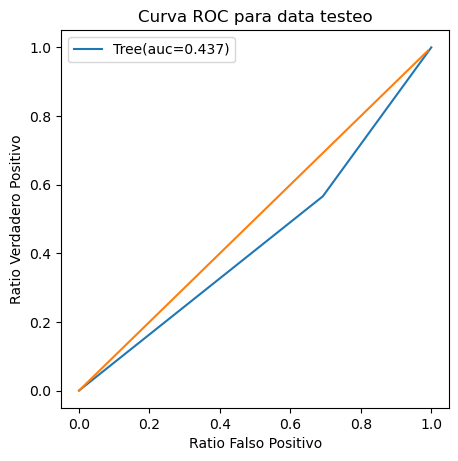

In [194]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label="Tree(auc=%0.3f)"%auc_test_tree)
plt.title('Curva ROC para data testeo')
plt.xlabel('Ratio Falso Positivo')
plt.ylabel('Ratio Verdadero Positivo')
plt.legend()

x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x,y)
plt.show()